In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [15]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Extrahieren der Klarnamen der Zielvariablen
target_names = iris_data.target_names

# Konvertieren der numerischen Werte in Klarnamen
y_names = [target_names[target] for target in y]

# Erstellen eines Pandas DataFrame für die Features und den Zielvektor
df = pd.DataFrame(X, columns=iris_data.feature_names)
df['target'] = y_names

df["is_virginica"] = np.where(df["target"] == "virginica", 1, 0)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,is_virginica
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [23]:
clf = LogisticRegression(random_state=0)
clf.fit(X= df[["sepal length (cm)"]], y= df["is_virginica"])

LogisticRegression(random_state=0)

In [26]:
clf.predict_proba([[7]])
#clf.predict_proba(df[["sepal length (cm)"]])

c:\Users\e01169\AppData\Local\miniconda3\envs\Maschinelles_Lernen\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.18120688, 0.81879312]])

In [37]:
x_supp = np.linspace(df["sepal length (cm)"].min(), df["sepal length (cm)"].max(), 10)
probs = clf.predict_proba(x_supp.reshape(-1, 1))[:, 1]
probs

c:\Users\e01169\AppData\Local\miniconda3\envs\Maschinelles_Lernen\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.01085381, 0.02607398, 0.06131422, 0.13746098, 0.27996975,
       0.48683228, 0.6983063 , 0.84956255, 0.93233372, 0.97111245])

In [27]:
import matplotlib.pyplot as plt

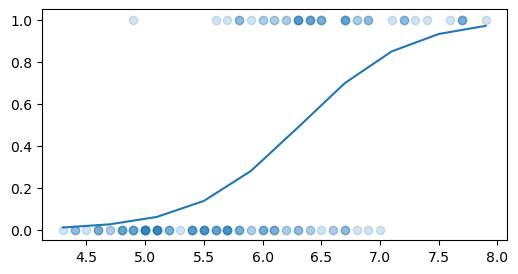

In [41]:
fig, ax = plt.subplots(figsize = (6, 3))
ax.scatter(x=df["sepal length (cm)"], y=df["is_virginica"], alpha = 0.2)
ax.plot(x_supp, probs)
plt.show()